# Modeling and Evaluation

In [3]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2024-03-21 12:32:20.885995: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
spotify = pd.read_csv('../Data/Cleaned Data/Cleaned_SpotifyFeatures.csv')
spotify.head(5)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,13,0.234,0.617,0.862,0.976000,0.1410,-12.855,1,0.0514,129.578,...,0,0,0,0,0,0,0,0,1,0
1,5,0.249,0.518,0.805,0.000000,0.3330,-6.248,1,0.0407,79.124,...,0,0,0,0,0,0,1,0,0,0
2,30,0.366,0.631,0.513,0.000004,0.1090,-6.376,1,0.0293,120.365,...,0,0,0,1,0,0,0,0,0,0
3,39,0.815,0.768,0.137,0.922000,0.1130,-13.284,0,0.0747,76.430,...,0,0,1,0,0,0,0,0,0,0
4,70,0.131,0.748,0.627,0.000000,0.0852,-6.029,1,0.0644,120.963,...,0,0,0,0,0,0,0,0,1,0


# KMeans Clusters

In [7]:
#Creating X
X = spotify[['popularity', 'loudness', 'energy', 'danceability', 'time_signature', 'tempo', 
             'valence', 'acousticness', 'instrumentalness', 'liveness', 'mode', 'speechiness']]

#Scaling X
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Finding the best clusters/silhouette score in range 2-10
rows = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=2024)
    km.fit(X_sc)
    
    inert = km.inertia_
    sil = silhouette_score(X_sc, km.labels_)
    
    rows.append((k, inert, sil))

/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

In [8]:
#Looking at the k's, inertia and silhouette scores
k_df = pd.DataFrame(rows, columns=['k', 'inertia', 'sil'])
k_df.head()

,k,inertia,sil
0,2,1.775740e+06,0.276513
1,3,1.513339e+06,0.305901
2,4,1.372815e+06,0.181236
3,5,1.280418e+06,0.169070
4,6,1.214378e+06,0.151751


# 3 Classes

In [9]:
# Creating 3 classifications for the popularity column
spotify['popularity'] = np.where(spotify['popularity'] <= 33, 0, spotify['popularity']) 
spotify['popularity'] = np.where((spotify['popularity'] >= 34) & (spotify['popularity'] <= 66), 1, spotify['popularity']) 
spotify['popularity'] = np.where(spotify['popularity'] >= 67, 2, spotify['popularity']) 

spotify.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,0,0.234,0.617,0.862,0.976000,0.1410,-12.855,1,0.0514,129.578,...,0,0,0,0,0,0,0,0,1,0
1,0,0.249,0.518,0.805,0.000000,0.3330,-6.248,1,0.0407,79.124,...,0,0,0,0,0,0,1,0,0,0
2,0,0.366,0.631,0.513,0.000004,0.1090,-6.376,1,0.0293,120.365,...,0,0,0,1,0,0,0,0,0,0
3,1,0.815,0.768,0.137,0.922000,0.1130,-13.284,0,0.0747,76.430,...,0,0,1,0,0,0,0,0,0,0
4,2,0.131,0.748,0.627,0.000000,0.0852,-6.029,1,0.0644,120.963,...,0,0,0,0,0,0,0,0,1,0


In [10]:
#Trying a DecisionTreeClassifier

# Creating X and y
X = spotify[['loudness', 'energy', 'danceability', 'time_signature', 'tempo', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'mode', 'speechiness']]
y = spotify['popularity']

#TTS on X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2024)

#Instantiating decision tree model
tree = DecisionTreeClassifier(max_depth=10, min_samples_split=5)

#Fitting X_train and y_train
tree.fit(X_train, y_train)

#Getting the score
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.7008765318370879, 0.680135667029562)

In [11]:
#Trying a RandomForest

#Instantiating the rf
rf = RandomForestClassifier(oob_score=True, max_features='sqrt')

#Fitting X_train and y_Train
rf.fit(X_train, y_train)

#Getting the scores
rf.score(X_train, y_train), rf.score(X_test, y_test), rf.oob_score_

(0.9962454289143846, 0.7047776568126622, 0.6990341400776038)

In [12]:
#Trying ExtraTreesClassifier

#Intantiating the rf
et = ExtraTreesClassifier(n_estimators=100, max_depth=35, min_samples_leaf=3)

#Fitting the model to X_train and y_Train
et.fit(X_train, y_train)

#Getting the scores
et.score(X_train, y_train), et.score(X_test, y_test)

(0.8622184071685789, 0.6980989866845323)

In [13]:
#Trying DNN

#Creating X and y
X = spotify.drop('popularity', axis=1)
y = spotify['popularity']

#TTS on X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#Scaling, fitting, and transforming the data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [14]:
#Checking the shape of X_train 
X_train.shape

(143292, 49)

In [15]:
#Creating dnn1
col = X_train.shape[1]
dnn1 = Sequential()
dnn1.add(Dense(100, activation='relu', input_shape=(col,)))
dnn1.add(Dense(50, activation='relu'))
dnn1.add(Dense(3, activation='softmax'))

#Compiling Model
dnn1.compile(loss='crossentropy', optimizer='rmsprop', metrics=['acc'])

#Fitting the model
hist1 = dnn1.fit(
    X_train_sc, y_train,
    validation_data=(X_test_sc, y_test),
    batch_size=32,
    epochs=10
)

/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - acc: 0.7812 - loss: 0.4516 - val_acc: 0.7897 - val_loss: 0.4266
Epoch 2/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - acc: 0.7904 - loss: 0.4300 - val_acc: 0.7884 - val_loss: 0.4310
Epoch 3/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - acc: 0.7896 - loss: 0.4286 - val_acc: 0.7927 - val_loss: 0.4273
Epoch 4/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - acc: 0.7906 - loss: 0.4301 - val_acc: 0.7879 - val_loss: 0.4356
Epoch 5/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.7930 - loss: 0.4262 - val_acc: 0.7939 - val_loss: 0.4186
Epoch 6/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - acc: 0.7924 - loss: 0.4261 - val_acc: 0.7884 - val_loss: 0.4331
Epoch 7/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - acc: 0.7918 - loss: 0.4274 - val_acc: 0.7890 - val_loss: 0.4370
Epoch 8/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - acc: 0.7936 - loss: 0.4286 - val_acc: 0.7878 - val_loss: 0.4310
Epoch 9/10
4478/4478 ━━━━━━━━━━━━━━━

In [17]:
#Trying DNN with different X's

#Assigning New X and y
X_dnn2 = spotify[['loudness', 'genre_Rap', 'genre_Rock', 'genre_Children\'s Music','genre_Pop', 'energy', 'danceability', 'time_signature', 'tempo', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'mode', 'speechiness']]
y_dnn2 = spotify['popularity']

#Train test splitting
X_dnn2_train, X_dnn2_test, y_dnn2_train, y_dnn2_test = train_test_split(X_dnn2, y_dnn2, random_state=123)

#Scaling the data
sc = StandardScaler()
X_dnn2_train_sc = sc.fit_transform(X_dnn2_train)
X_dnn2_test_sc = sc.transform(X_dnn2_test)

In [19]:
#Creating dnn2 with regularization technique "Dropout"

col = X_dnn2_train.shape[1]
dnn2 = Sequential()
dnn2.add(Dense(100, activation='relu', input_shape=(col,)))
dnn2.add(Dropout(0.5))
dnn2.add(Dense(50, activation='relu'))
dnn2.add(Dropout(0.5))
dnn2.add(Dense(50, activation='relu'))
dnn2.add(Dropout(0.5))
dnn2.add(Dense(65, activation='relu'))
dnn2.add(Dropout(0.5))
dnn2.add(Dense(3, activation='softmax'))

#Compiling dnn2
dnn2.compile(loss='crossentropy', optimizer='adam', metrics=['acc'])

#Fitting the model
hist2 = dnn2.fit(
    X_dnn2_train_sc, y_dnn2_train,
    validation_data=(X_dnn2_test_sc, y_dnn2_test),
    batch_size=32,
    epochs=10
)

Epoch 1/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - acc: 0.6340 - loss: 0.7325 - val_acc: 0.6669 - val_loss: 0.6178
Epoch 2/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - acc: 0.6880 - loss: 0.6207 - val_acc: 0.6877 - val_loss: 0.6073
Epoch 3/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - acc: 0.6910 - loss: 0.6126 - val_acc: 0.6889 - val_loss: 0.6047
Epoch 4/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - acc: 0.6941 - loss: 0.6083 - val_acc: 0.6868 - val_loss: 0.6043
Epoch 5/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - acc: 0.6957 - loss: 0.6090 - val_acc: 0.7016 - val_loss: 0.5900
Epoch 6/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.6936 - loss: 0.6054 - val_acc: 0.6973 - val_loss: 0.5944
Epoch 7/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.6941 - loss: 0.6072 - val_acc: 0.7002 - val_loss: 0.5968
Epoch 8/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - acc: 0.6957 - loss: 0.6063 - val_acc: 0.7050 - val_loss: 0.5891
Epoch 9/10
4478/4478 ━━━━━━━━━━━

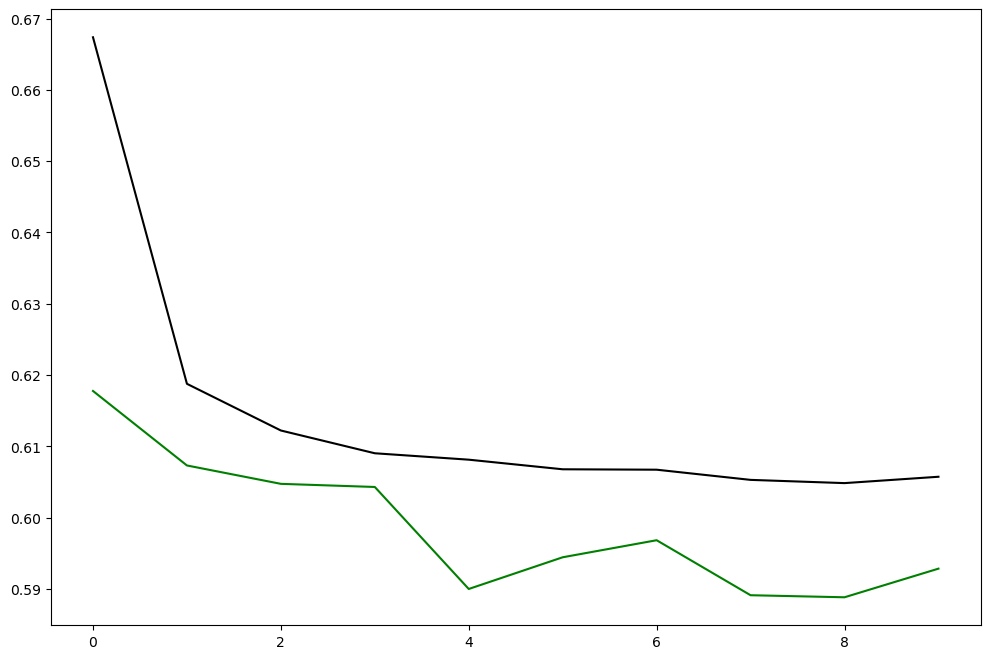

In [21]:
#Plotting to see the loss

train_loss = hist2.history['loss']
test_loss = hist2.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='black')
plt.plot(test_loss, label='Testing loss', color='green')

In [22]:
#Checking the baseline
spotify['popularity'].value_counts(normalize=True).sort_index()

popularity
0    0.393900
1    0.567331
2    0.038769
Name: proportion, dtype: float64

# 5 Classes

In [4]:
#The values are very unbalanced, let's read in the DF again and create 5 classifications instead of 3
spotify2 = pd.read_csv('../Data/Cleaned Data/Cleaned_SpotifyFeatures.csv')


spotify2['popularity'] = np.where(spotify2['popularity'] <= 20, 0, spotify2['popularity']) 
spotify2['popularity'] = np.where((spotify2['popularity'] >= 21) & (spotify2['popularity'] <= 40), 1, spotify2['popularity']) 
spotify2['popularity'] = np.where((spotify2['popularity'] >= 41) & (spotify2['popularity'] <= 60), 2, spotify2['popularity'])
spotify2['popularity'] = np.where((spotify2['popularity'] >= 61) & (spotify2['popularity'] <= 80), 3, spotify2['popularity'])
spotify2['popularity'] = np.where(spotify2['popularity'] >= 81, 4, spotify2['popularity']) 


spotify2.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,0,0.234,0.617,0.862,0.976000,0.1410,-12.855,1,0.0514,129.578,...,0,0,0,0,0,0,0,0,1,0
1,0,0.249,0.518,0.805,0.000000,0.3330,-6.248,1,0.0407,79.124,...,0,0,0,0,0,0,1,0,0,0
2,1,0.366,0.631,0.513,0.000004,0.1090,-6.376,1,0.0293,120.365,...,0,0,0,1,0,0,0,0,0,0
3,1,0.815,0.768,0.137,0.922000,0.1130,-13.284,0,0.0747,76.430,...,0,0,1,0,0,0,0,0,0,0
4,3,0.131,0.748,0.627,0.000000,0.0852,-6.029,1,0.0644,120.963,...,0,0,0,0,0,0,0,0,1,0


In [5]:
#Checking the balance
spotify2['popularity'].value_counts(normalize=True)

popularity
2    0.373445
1    0.369154
0    0.169312
3    0.085179
4    0.002910
Name: proportion, dtype: float64

In [ ]:
# Random forest for 5 classes using same features classifying 3 classes

In [7]:
X2 = spotify2[['loudness', 'energy', 'danceability', 'time_signature', 'tempo', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'mode', 'speechiness']]
y2 = spotify2['popularity']

#TTS on X and y
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify=y2, random_state=2024)

In [8]:
rf2 = RandomForestClassifier(n_estimators=150, oob_score=True, max_features='sqrt')

#TTS on X and y
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=123)

#Creating parameters
p2 = X2.shape[1]
params2 = {
    'max_depth': np.append(np.arange(1, 21), None),
    'max_features': np.arange(1, p2 + 1),
    'min_samples_leaf': np.arange(1, 31)
}

#Using a RandomSearchCV
rs = RandomizedSearchCV(rf2, params2, n_iter=50, cv=5, n_jobs=4)

#Fitting the model
rs.fit(X2_train, y2_train)

#Getting the score
rs.score(X2_train, y2_train), rs.score(X2_test, y2_test)

(0.7674608491751109, 0.5485512101164056)

In [25]:
# Creating X2 and y2
X3 = spotify2[['loudness', 'energy', 'danceability', 'time_signature', 'tempo', 'valence']]
y3 = spotify2['popularity']

In [29]:
#Trying RandomForest again

#Instantiating rf2
rf3 = RandomForestClassifier(n_estimators=150, oob_score=True, max_features='sqrt')

#TTS on X and y
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=123)

#Creating parameters
p3 = X3.shape[1]
params3 = {
    'max_depth': np.append(np.arange(1, 21), None),
    'max_features': np.arange(1, p3 + 1),
    'min_samples_leaf': np.arange(1, 31)
}

#Using a RandomSearchCV
rs = RandomizedSearchCV(rf3, params3, n_iter=50, cv=5, n_jobs=4)

#Fitting the model
rs.fit(X3_train, y3_train) 

#Getting the score
rs.score(X3_test, y3_test)

0.5011933673896659

In [ ]:
#Instantiating
et2 = ExtraTreesClassifier(n_estimators=200)

#Fitting the model
et2.fit(X2_train, y2_train)

#Getting the score
et2.score(X2_train, y2_train), et2.score(X2_test, y2_test)

In [31]:
# Trying DNN again

#Assigning New X and y
X3 = spotify2[['loudness', 'genre_Rap', 'genre_Rock', 'genre_Children\'s Music','genre_Pop', 'energy', 'danceability', 'time_signature', 'tempo', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'mode', 'speechiness']]
y3 = spotify2['popularity']

#Train test splitting
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=123)

#Scaling the data
sc = StandardScaler()
X3_train_sc = sc.fit_transform(X3_train)
X3_test_sc = sc.transform(X3_test)

#Creating dnn4
col3 = X3_train.shape[1]
dnn3 = Sequential()
dnn3.add(Dense(100, activation='relu', input_shape=(col3,)))
dnn3.add(Dropout(0.5))
dnn3.add(Dense(50, activation='relu'))
dnn3.add(Dropout(0.5))
dnn3.add(Dense(50, activation='relu'))
dnn3.add(Dropout(0.5))
dnn3.add(Dense(65, activation='relu'))
dnn3.add(Dropout(0.5))
dnn3.add(Dense(5, activation='softmax'))

#Compiling dnn2
dnn3.compile(loss='crossentropy', optimizer='adam', metrics=['acc'])

#Fitting the model
hist5 = dnn3.fit(
    X3_train_sc, y3_train,
    validation_data=(X3_test_sc, y3_test),
    batch_size=32,
    epochs=10
)

/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - acc: 0.4685 - loss: 1.1281 - val_acc: 0.5516 - val_loss: 0.9386
Epoch 2/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - acc: 0.5557 - loss: 0.9588 - val_acc: 0.5706 - val_loss: 0.9250
Epoch 3/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - acc: 0.5603 - loss: 0.9524 - val_acc: 0.5755 - val_loss: 0.9229
Epoch 4/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.5635 - loss: 0.9476 - val_acc: 0.5708 - val_loss: 0.9169
Epoch 5/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - acc: 0.5637 - loss: 0.9462 - val_acc: 0.5753 - val_loss: 0.9217
Epoch 6/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - acc: 0.5654 - loss: 0.9413 - val_acc: 0.5730 - val_loss: 0.9176
Epoch 7/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.5708 - loss: 0.9399 - val_acc: 0.5700 - val_loss: 0.9225
Epoch 8/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - acc: 0.5678 - loss: 0.9448 - val_acc: 0.5810 - val_loss: 0.9181
Epoch 9/10
4478/4478 ━━━━━━━━━━━

In [32]:
#Trying DNN once more with original DNN model

#Creating X and y
X = spotify2.drop('popularity', axis=1)
y = spotify2['popularity']

#TTS on X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#Scaling, fitting, and transforming the data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [33]:
#Creating dnn1
col = X_train.shape[1]
dnn1 = Sequential()
dnn1.add(Dense(100, activation='relu', input_shape=(col,)))
dnn1.add(Dense(50, activation='relu'))
dnn1.add(Dense(5, activation='softmax'))

#Compiling Model
dnn1.compile(loss='crossentropy', optimizer='rmsprop', metrics=['acc'])

#Fitting the model
hist1 = dnn1.fit(
    X_train_sc, y_train,
    validation_data=(X_test_sc, y_test),
    batch_size=32,
    epochs=10
)

/Users/dillondiatlo/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - acc: 0.7046 - loss: 0.7382 - val_acc: 0.7293 - val_loss: 0.6705
Epoch 2/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - acc: 0.7297 - loss: 0.6688 - val_acc: 0.7260 - val_loss: 0.6738
Epoch 3/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - acc: 0.7291 - loss: 0.6672 - val_acc: 0.7293 - val_loss: 0.6785
Epoch 4/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - acc: 0.7276 - loss: 0.6764 - val_acc: 0.7273 - val_loss: 0.6868
Epoch 5/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - acc: 0.7300 - loss: 0.6753 - val_acc: 0.7278 - val_loss: 0.6883
Epoch 6/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - acc: 0.7291 - loss: 0.6785 - val_acc: 0.7274 - val_loss: 0.6895
Epoch 7/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - acc: 0.7313 - loss: 0.6744 - val_acc: 0.7234 - val_loss: 0.7032
Epoch 8/10
4478/4478 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - acc: 0.7284 - loss: 0.6819 - val_acc: 0.7267 - val_loss: 0.7000
Epoch 9/10
4478/4478 ━━━━━━━━━━━━━━━━